<a href="https://colab.research.google.com/github/ShivaniDeonath/Development-of-Interactive-Cyber-Threat-Visualization-Dashboard/blob/main/Week1_Python_Data_Analysis_Cyber_Threats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PYTHON NOTEBOOK**

# **Upload Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Cyber_Threats_Data.csv to Cyber_Threats_Data.csv


# **Import Libraries & Load Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cyber_Threats_Data.csv')
df.head()

,Year,Attacker_IP_Address,Target_IP_Address,Location,Type_of_Attack,Device_of_Attack,Security_Type
0,2016,79.53.206.145,60.255.175.28,Russia,Malware,Cloud VM,SIEM
1,2016,140.121.213.127,202.186.192.167,Brazil,Ransomware,IoT Device,SIEM
2,2016,130.240.181.85,182.169.190.72,India,Man-in-the-Middle,IoT Device,Firewall
3,2016,122.67.64.131,209.206.17.113,USA,APT,IoT Device,EDR
4,2016,249.107.11.48,83.60.95.193,China,APT,Mobile Device,IPS


# **Dataset Overview**

# **Shape of Dataset**

In [3]:
df.shape

(300, 7)

# **Column Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 300 non-null    int64 
 1   Attacker_IP_Address  300 non-null    object
 2   Target_IP_Address    300 non-null    object
 3   Location             300 non-null    object
 4   Type_of_Attack       300 non-null    object
 5   Device_of_Attack     300 non-null    object
 6   Security_Type        300 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


# **Check Missing Values**

In [5]:
df.isnull().sum()

,0
Year,0
Attacker_IP_Address,0
Target_IP_Address,0
Location,0
Type_of_Attack,0
Device_of_Attack,0
Security_Type,0


# **Statistical Summary**

In [6]:
df.describe(include='all')

,Year,Attacker_IP_Address,Target_IP_Address,Location,Type_of_Attack,Device_of_Attack,Security_Type
count,300.00000,300,300,300,300,300,300
unique,NaN,300,300,9,8,5,6
top,NaN,80.222.223.213,54.215.75.119,India,Brute Force,IoT Device,SIEM
freq,NaN,1,1,40,46,69,55
mean,2020.50000,NaN,NaN,NaN,NaN,NaN,NaN
std,2.87708,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2018.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.50000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.00000,NaN,NaN,NaN,NaN,NaN,NaN


## **DATA ANALYSIS & VISUALIZATION**

# **Cyber Attacks Per Year**

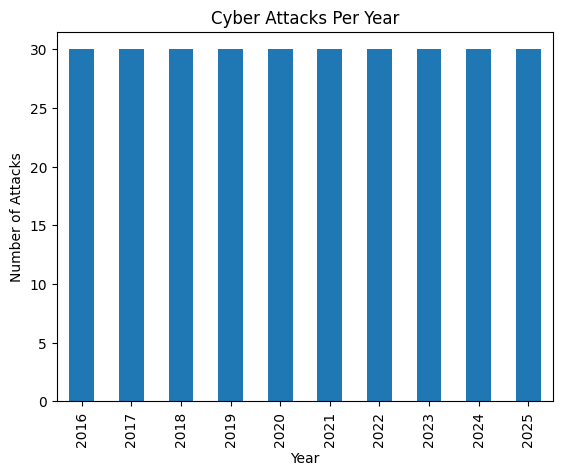

In [7]:
yearly_attacks = df['Year'].value_counts().sort_index()

plt.figure()
yearly_attacks.plot(kind='bar')
plt.title('Cyber Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# **Most Common Types of Cyber Attacks**

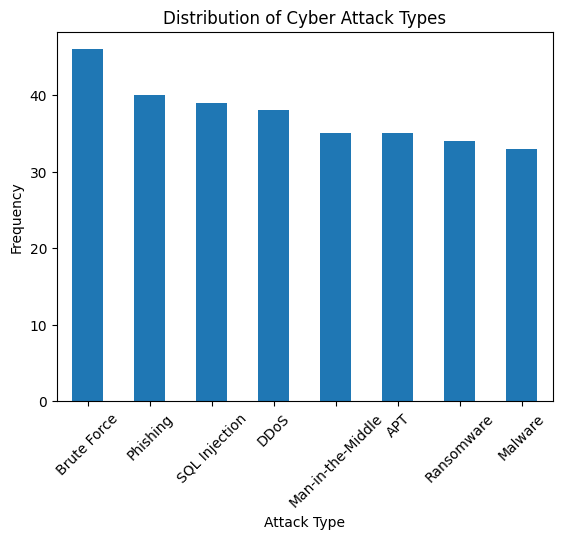

In [8]:
attack_types = df['Type_of_Attack'].value_counts()

plt.figure()
attack_types.plot(kind='bar')
plt.title('Distribution of Cyber Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# **Country-wise Attack Distribution**

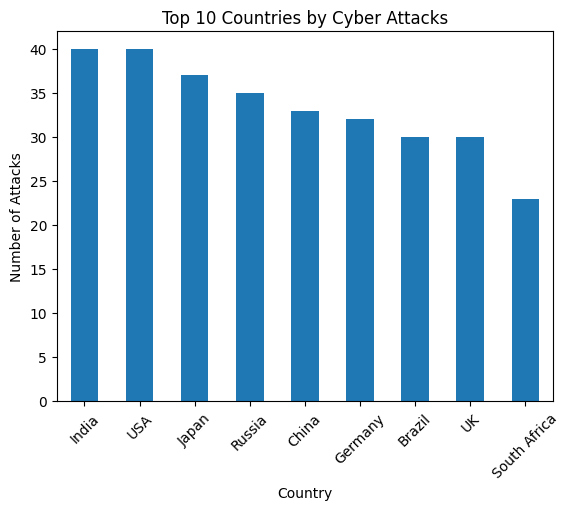

In [9]:
location_counts = df['Location'].value_counts().head(10)

plt.figure()
location_counts.plot(kind='bar')
plt.title('Top 10 Countries by Cyber Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# **Devices Used for Attacks**

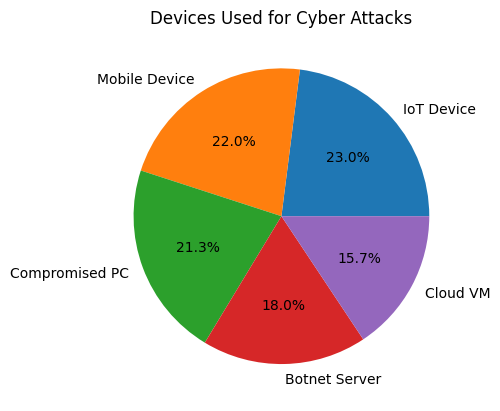

In [10]:
device_counts = df['Device_of_Attack'].value_counts()

plt.figure()
device_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Devices Used for Cyber Attacks')
plt.ylabel('')
plt.show()

# **Security Mechanisms Involved**

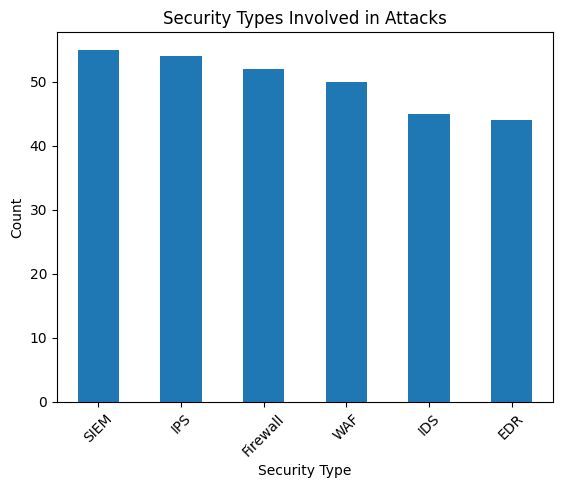

In [11]:
security_counts = df['Security_Type'].value_counts()

plt.figure()
security_counts.plot(kind='bar')
plt.title('Security Types Involved in Attacks')
plt.xlabel('Security Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Top Targeted IP Addresses**

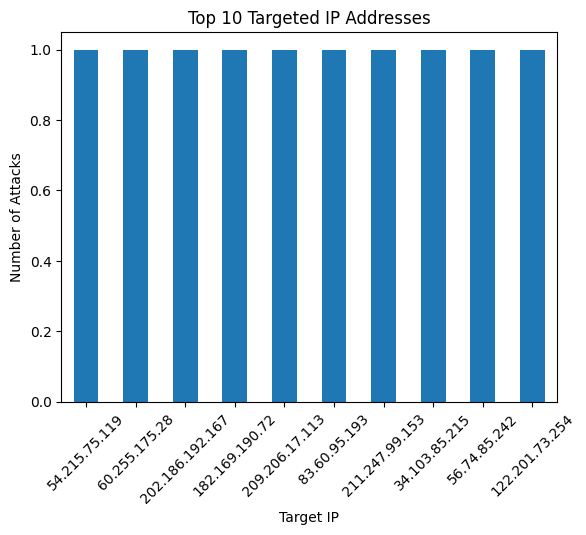

In [12]:
top_targets = df['Target_IP_Address'].value_counts().head(10)

plt.figure()
top_targets.plot(kind='bar')
plt.title('Top 10 Targeted IP Addresses')
plt.xlabel('Target IP')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# **Repeated Attackers (Attacker IP Analysis)**

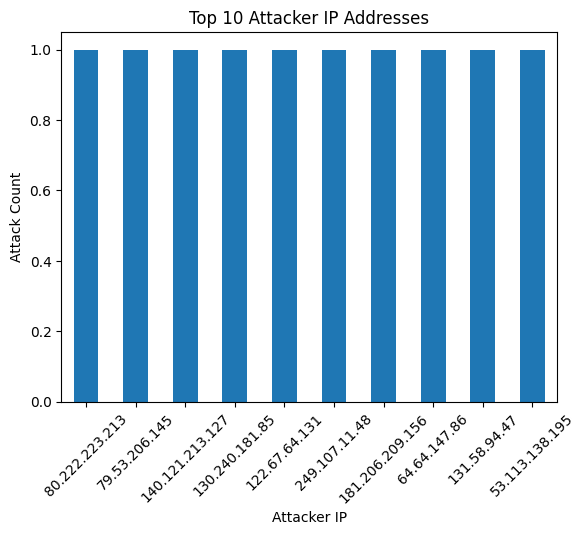

In [13]:
top_attackers = df['Attacker_IP_Address'].value_counts().head(10)

plt.figure()
top_attackers.plot(kind='bar')
plt.title('Top 10 Attacker IP Addresses')
plt.xlabel('Attacker IP')
plt.ylabel('Attack Count')
plt.xticks(rotation=45)
plt.show()

# **Attack Type vs Device (Cross Analysis)**

In [14]:
attack_device = pd.crosstab(df['Type_of_Attack'], df['Device_of_Attack'])

attack_device

Device_of_Attack,Botnet Server,Cloud VM,Compromised PC,IoT Device,Mobile Device
Type_of_Attack,,,,,
APT,5,8,2,12,8
Brute Force,8,2,11,12,13
DDoS,7,6,10,8,7
Malware,7,7,10,4,5
Man-in-the-Middle,5,6,3,14,7
Phishing,6,3,14,4,13
Ransomware,7,8,5,8,6
SQL Injection,9,7,9,7,7


# **Visualization**

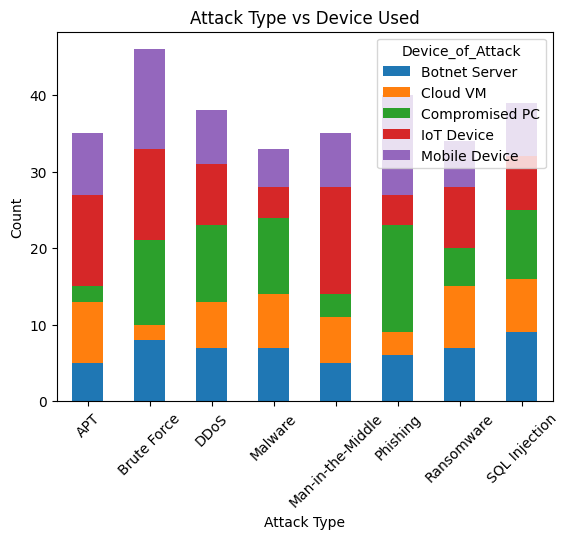

In [15]:
attack_device.plot(kind='bar', stacked=True)
plt.title('Attack Type vs Device Used')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Attack Type vs Security Type**

In [16]:
attack_security = pd.crosstab(df['Type_of_Attack'], df['Security_Type'])

attack_security

Security_Type,EDR,Firewall,IDS,IPS,SIEM,WAF
Type_of_Attack,,,,,,
APT,6,8,5,6,6,4
Brute Force,8,7,6,7,13,5
DDoS,3,5,11,6,6,7
Malware,6,6,5,7,7,2
Man-in-the-Middle,5,7,5,4,5,9
Phishing,7,6,6,4,12,5
Ransomware,2,8,3,8,4,9
SQL Injection,7,5,4,12,2,9


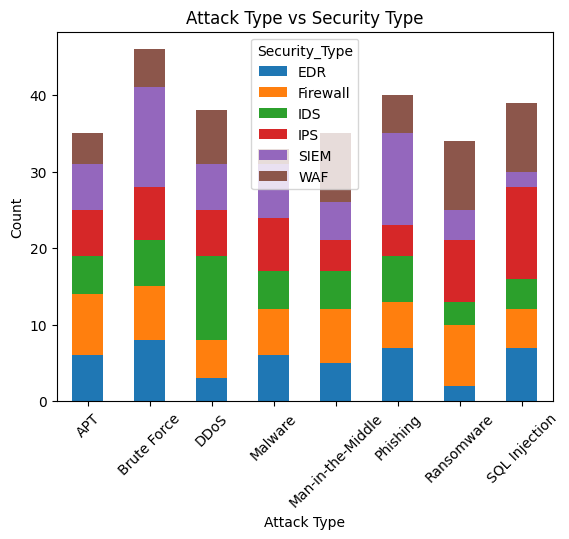

In [17]:
attack_security.plot(kind='bar', stacked=True)
plt.title('Attack Type vs Security Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Country vs Attack Type Heatmap**

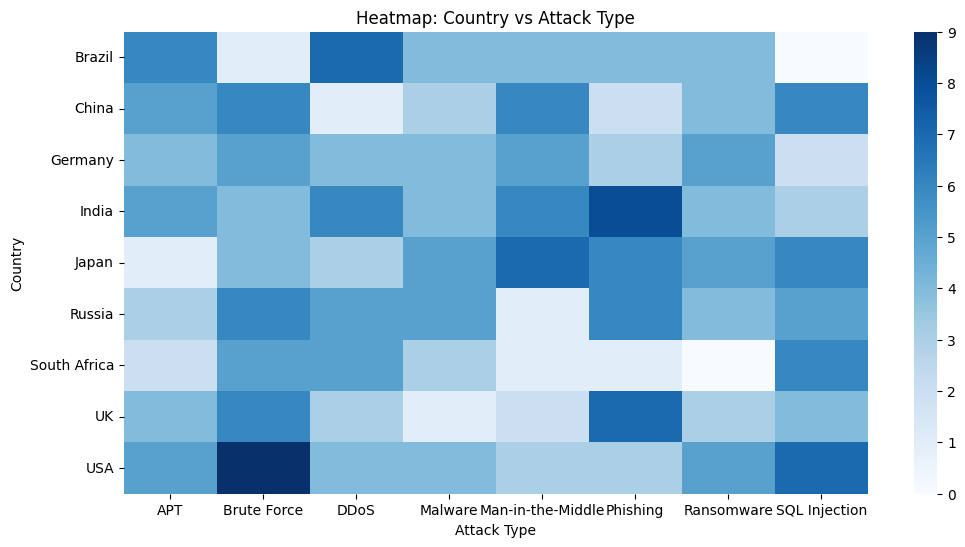

In [18]:
country_attack = pd.crosstab(df['Location'], df['Type_of_Attack'])

plt.figure(figsize=(12,6))
sns.heatmap(country_attack, cmap='Blues')
plt.title('Heatmap: Country vs Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Country')
plt.show()